In [1]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np

In [2]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [41]:
from src.data.shapenet import ShapeNet

{'02691156': 'airplane', '02933112': 'cabinet', '02958343': 'car', '03001627': 'chair', '03636649': 'lamp', '04256520': 'sofa', '04379243': 'table', '04530566': 'watercraft'}


In [42]:
ShapeNet.class_name_mapping

{'02691156': 'airplane',
 '02933112': 'cabinet',
 '02958343': 'car',
 '03001627': 'chair',
 '03636649': 'lamp',
 '04256520': 'sofa',
 '04379243': 'table',
 '04530566': 'watercraft'}

In [43]:
dataset = ShapeNet('train','02691156' )

(2831, 1)


In [44]:
data = dataset[2]

5
torch.Size([4, 224, 224])


In [33]:
%pip install open3d

Note: you may need to restart the kernel to use updated packages.


In [34]:
import open3d as o3d
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(data['pcl'])
o3d.io.write_point_cloud("./data.ply", pcd)

True

In [35]:
data['name']

'98011d15300361e54f0e6f5b218145e'

In [37]:
import matplotlib.pyplot as plt

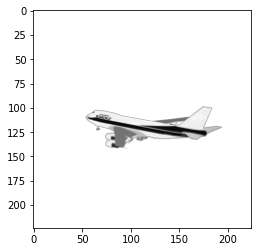

In [58]:
tensor_image = data['img_rgb']
plt.imshow(  tensor_image.permute(1, 2, 0)  )


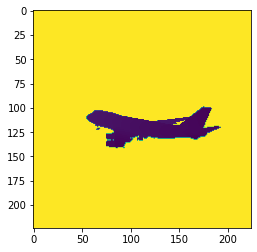

In [59]:
tensor_image = data['img_mask']
plt.imshow(  tensor_image.permute(1, 2, 0)  )